# Statistical Analysis of my Technical Articles

I love to write blogs on Python, Data Science/AI, Machine Learning & NLP, etc. After receiving an overwhelming number of fans and views
in few of my articles, I decided to carry out an exploratory data analysis of my writer data at [Medium](https://sukanyabag.medium.com/). I write for 2 renowned 
publications, viz., [Analytics Vidhya](https://medium.com/analytics-vidhya) and [Python in Plain English](https://python.plainenglish.io/), and I wanted to know which publications generates more
engagement in my articles, whether fans read all articles or specific ones, how publications impact view/reads, so on and so forth! 

Hence, I scraped and collected the data from Medium and performed this analysis which gave pretty much awesome insights which I can follow in my next articles to increase my followers and readers!

In [230]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 25 20:45:45 2022

@author: sukanya
"""
#ignore warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
warnings.simplefilter(action='ignore', category=FutureWarning)

#import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
%matplotlib inline

In [231]:
#notebook styling
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [138]:
#load scraped data
df = pd.read_csv('mywriterstats.csv', encoding='cp1252')

In [177]:
#sanity check
df.head(15)

,Title,Publication,Read Time,Views,Reads,Read Ratio,Fans
0,The Complete XGBoost Therapy with Python,Python In Plain English,11,438,98,22,19
1,Federated Learning-A Beginner's Guide,Analytics Vidhya,7,33,21,64,15
2,Automated Hyperparameter Tuning with Keras Tun...,Analytics Vidhya,7,2200,706,32,37
3,"Text Summarization using BERT, GPT2, XLNet",Analytics Vidhya,6,14600,6300,43,59
4,Transformers — Let’s Dive Deeeep!,Analytics Vidhya,12,829,256,31,24
5,Handling Imbalanced Data — Intuition to Implem...,Analytics Vidhya,5,1100,543,48,41
6,Which Machine Learning Algorithm Should You Us...,Analytics Vidhya,5,29000,9000,31,600
7,Flasgger —an API playground with Flask and Swa...,Analytics Vidhya,2,6600,3700,56,25
8,COVID-19 Detector Flask App from Chest X-ray I...,Analytics Vidhya,4,1400,768,54,24
9,"Automated, Quick and Powerful EDA with Sweetvi...",Analytics Vidhya,6,694,312,45,19


I have written a total of 15 blogs till now, amongst which 10 are published in Analytics Vidhya, 1 in Python in Plain English (since I recently joined there), and 4 in Medium itself, without any publications(when I just joined Medium and was not yet selected as writer for any publication).

In [178]:
#drop indexes
df.reset_index(drop=True, inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15 non-null     object
 1   Publication  11 non-null     object
 2   Read Time    15 non-null     int64 
 3   Views        15 non-null     int64 
 4   Reads        15 non-null     int64 
 5   Read Ratio   15 non-null     int64 
 6   Fans         15 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 968.0+ bytes


In [180]:
#basic article statistics
df.describe()

,Read Time,Views,Reads,Read Ratio,Fans
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,6.400000,3868.466667,1485.066667,45.266667,61.466667
std,2.557901,7941.552663,2711.635813,11.597208,149.603221
min,2.000000,33.000000,21.000000,22.000000,8.000000
25%,5.000000,259.500000,106.000000,37.500000,13.500000
50%,6.000000,694.000000,256.000000,48.000000,19.000000
75%,7.000000,1800.000000,737.000000,52.500000,31.000000
max,12.000000,29000.000000,9000.000000,64.000000,600.000000


From the description we can see that -
* Total count of my articles - 15
* Average Read Time - 6.4 mins
* Average Fans - ~62
* Average Read Ratio - 45.2
* Average Views - 3868.4
* Max Reads - 9000
* Max Views - 29000

In [218]:
#check missing values
df.isnull().any()

Title          False
Publication     True
Read Time      False
Views          False
Reads          False
Read Ratio     False
Fans           False
Fan Ratio      False
dtype: bool

As stated earlier, Publications has True for null-check as 4 of my articles are not published anywhere except Medium itself. For, rest of the columns, there is no null/missing values.

In [182]:
#stats wrt fans
df.groupby('Fans').describe().sample(9)

Read Time                                             Views           \
         count mean       std  min   25%  50%    75%   max count     mean   
Fans                                                                        
59         1.0  6.0       NaN  6.0  6.00  6.0   6.00   6.0   1.0  14600.0   
10         1.0  8.0       NaN  8.0  8.00  8.0   8.00   8.0   1.0    264.0   
25         1.0  2.0       NaN  2.0  2.00  2.0   2.00   2.0   1.0   6600.0   
12         1.0  7.0       NaN  7.0  7.00  7.0   7.00   7.0   1.0    255.0   
18         1.0  6.0       NaN  6.0  6.00  6.0   6.00   6.0   1.0    434.0   
11         1.0  4.0       NaN  4.0  4.00  4.0   4.00   4.0   1.0     95.0   
600        1.0  5.0       NaN  5.0  5.00  5.0   5.00   5.0   1.0  29000.0   
24         2.0  8.0  5.656854  4.0  6.00  8.0  10.00  12.0   2.0   1114.5   
19         2.0  8.5  3.535534  6.0  7.25  8.5   9.75  11.0   2.0    566.0   

      ...   Reads         Read Ratio                                      \
      ...     75%     max      count  mean        std   min    25%   50%   
Fans  ...                                                                  
59    ...  6300.0  6300.0        1.0  43.0        NaN  43.0  43.00  43.0   
10    ...   149.0   149.0        1.0  56.0        NaN  56.0  56.00  56.0   
25    ...  3700.0  3700.0        1.0  56.0        NaN  56.0  56.00  56.0   
12    ...   114.0   114.0        1.0  45.0        NaN  45.0  45.00  45.0   
18    ...   218.0   218.0        1.0  50.0        NaN  50.0  50.00  50.0   
11    ...    48.0    48.0        1.0  51.0        NaN  51.0  51.00  51.0   
600   ...  9000.0  9000.0        1.0  31.0        NaN  31.0  31.00  31.0   
24    ...   640.0   768.0        2.0  42.5  16.263456  31.0  36.75  42.5   
19    ...   258.5   312.0        2.0  33.5  16.263456  22.0  27.75  33.5   

                   
        75%   max  
Fans               
59    43.00  43.0  
10    56.00  56.0  
25    56.00  56.0  
12    45.00  45.0  
18    50.00  50.0  
11    51.00  51.0  
600   31.00  31.0  
24    48.25  54.0  
19    39.25  45.0  

[9 rows x 32 columns]

In [183]:
#stats wrt title
df.groupby('Title').describe().sample(15)

Read Time                  \
                                                       count  mean std   min   
Title                                                                          
Flasgger —an API playground with Flask and Swag...       1.0   2.0 NaN   2.0   
Data Science versus Machine Learning — a brief ...       1.0   4.0 NaN   4.0   
Automated, Quick and Powerful EDA with Sweetviz...       1.0   6.0 NaN   6.0   
Text Summarization using BERT, GPT2, XLNet               1.0   6.0 NaN   6.0   
The Complete XGBoost Therapy with Python                 1.0  11.0 NaN  11.0   
What is Data Science?                                    1.0   7.0 NaN   7.0   
Which Machine Learning Algorithm Should You Use...       1.0   5.0 NaN   5.0   
Can you master Machine Learning if You Suck at ...       1.0   6.0 NaN   6.0   
10 Best Android Developer Tool to Get You Start...       1.0   6.0 NaN   6.0   
COVID-19 Detector Flask App from Chest X-ray Im...       1.0   4.0 NaN   4.0   
Federated Learning-A Beginner's Guide                    1.0   7.0 NaN   7.0   
Handling Imbalanced Data — Intuition to Impleme...       1.0   5.0 NaN   5.0   
Top 15 Python Libraries for Data Science You Mu...       1.0   8.0 NaN   8.0   
Automated Hyperparameter Tuning with Keras Tune...       1.0   7.0 NaN   7.0   
Transformers — Let’s Dive Deeeep!                        1.0  12.0 NaN  12.0   

                                                                            \
                                                     25%   50%   75%   max   
Title                                                                        
Flasgger —an API playground with Flask and Swag...   2.0   2.0   2.0   2.0   
Data Science versus Machine Learning — a brief ...   4.0   4.0   4.0   4.0   
Automated, Quick and Powerful EDA with Sweetviz...   6.0   6.0   6.0   6.0   
Text Summarization using BERT, GPT2, XLNet           6.0   6.0   6.0   6.0   
The Complete XGBoost Therapy with Python            11.0  11.0  11.0  11.0   
What is Data Science?                                7.0   7.0   7.0   7.0   
Which Machine Learning Algorithm Should You Use...   5.0   5.0   5.0   5.0   
Can you master Machine Learning if You Suck at ...   6.0   6.0   6.0   6.0   
10 Best Android Developer Tool to Get You Start...   6.0   6.0   6.0   6.0   
COVID-19 Detector Flask App from Chest X-ray Im...   4.0   4.0   4.0   4.0   
Federated Learning-A Beginner's Guide                7.0   7.0   7.0   7.0   
Handling Imbalanced Data — Intuition to Impleme...   5.0   5.0   5.0   5.0   
Top 15 Python Libraries for Data Science You Mu...   8.0   8.0   8.0   8.0   
Automated Hyperparameter Tuning with Keras Tune...   7.0   7.0   7.0   7.0   
Transformers — Let’s Dive Deeeep!                   12.0  12.0  12.0  12.0   

                                                   Views           ...  \
                                                   count     mean  ...   
Title                                                              ...   
Flasgger —an API playground with Flask and Swag...   1.0   6600.0  ...   
Data Science versus Machine Learning — a brief ...   1.0     95.0  ...   
Automated, Quick and Powerful EDA with Sweetviz...   1.0    694.0  ...   
Text Summarization using BERT, GPT2, XLNet           1.0  14600.0  ...   
The Complete XGBoost Therapy with Python             1.0    438.0  ...   
What is Data Science?                                1.0    255.0  ...   
Which Machine Learning Algorithm Should You Use...   1.0  29000.0  ...   
Can you master Machine Learning if You Suck at ...   1.0    434.0  ...   
10 Best Android Developer Tool to Get You Start...   1.0     85.0  ...   
COVID-19 Detector Flask App from Chest X-ray Im...   1.0   1400.0  ...   
Federated Learning-A Beginner's Guide                1.0     33.0  ...   
Handling Imbalanced Data — Intuition to Impleme...   1.0   1100.0  ...   
Top 15 Python Libraries for Data Science You Mu...   1.0    264.0  ...   
Automated Hyperparame

Text(0, 0.5, '')

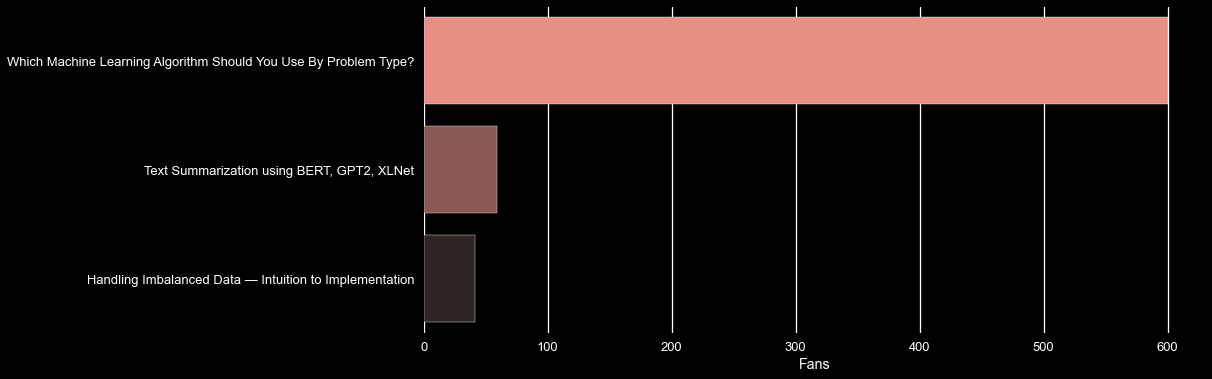

In [192]:
#show me the articles which gained max fans (top 3)
c = plt.cm.autumn(np.linspace(0,1,10))
plt.figure(figsize=(14,6))
artticles_w_max_fans = df.sort_values(by='Fans', ascending=False).head(3)
#color_palette = ['pink', 'indigo', 'cyan']
plt.style.use(['dark_background'])
plt.style.use('seaborn-talk')
sns.color_palette("vlag", as_cmap=True)
plot = sns.barplot(x='Fans', y='Title', data=artticles_w_max_fans, palette= "dark:salmon_r", color=c)
plt.ylabel('')

So, from the stats wrt title table and the visualization above we can fairly conclude that-

* The top 3 articles right now are-
    1. Which Machine Learning Algorithm Should You Use By Problem Type?	
    2. Text Summarization using BERT, GPT2, XLNet	
    3. Handling Imbalanced Data — Intuition to Implementation
    
* The fans I got from the top 3 articles are - 
    1. Which Machine Learning Algorithm Should You Use By Problem Type?	- approx. 600 fans
    2. Text Summarization using BERT, GPT2, XLNet - approx. 59 fans
    3. Handling Imbalanced Data — Intuition to Implementation - approx. 41 fans

<AxesSubplot:xlabel='Fans', ylabel='Density'>

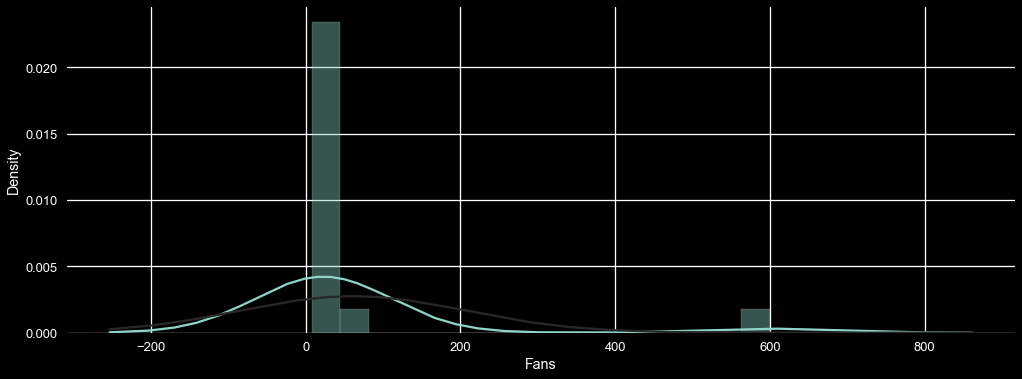

In [219]:
# the Fans distribution with a histogram and maximum likelihood gaussian distribution fit
plt.figure(figsize=(17,6))
plt.style.use('seaborn-talk')
sns.distplot(df['Fans'], bins = 16, fit=norm, kde=True)

The distplot shows that the rank 1 article (Which Machine Learning Algorithm Should You Use By Problem Type?) made an unbelievable performance that is overshadowing all others. Yes, this blog received 29k views and 9k reads with an overwhelming amount of 9000 fans! No other article stat could even get close to it, hence the graph. However, to show at what density estimate fan counts lie for almost all articles, i used the Kernel Density Estimation (kde = True) which shows that fans are generally lies in the density of 41-57% estimation. 

Hence, it is proved that the 1st article was EXCEPTIONALLY good!

Text(0, 0.5, '')

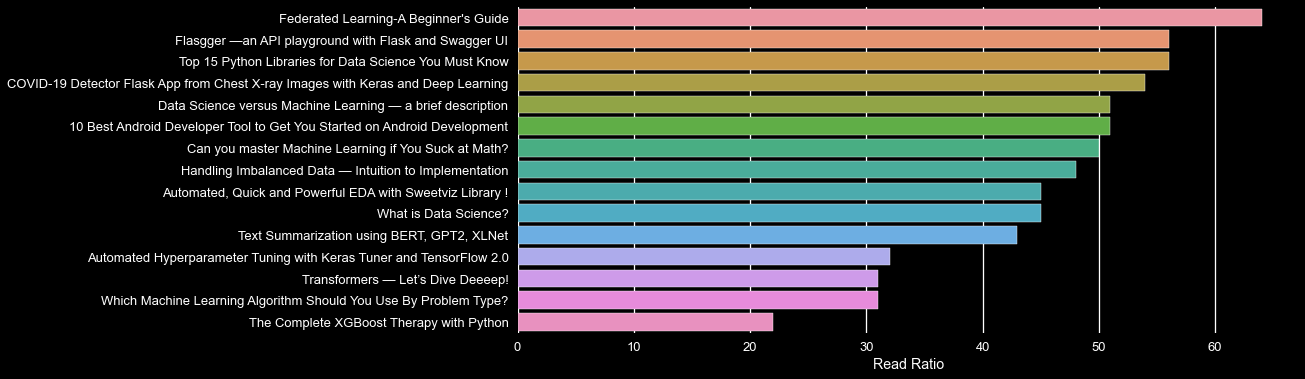

In [195]:
#how effective a post was at turning views into reads == topmost read ratios

plt.figure(figsize=(14,6))
plt.style.use('seaborn-talk')
plt.style.use(['dark_background'])
top_read_ratios = df.sort_values(by='Read Ratio', ascending=False).head(16)
graph = sns.barplot('Read Ratio', 'Title', data=top_read_ratios)
plt.ylabel('')

So, the most effective post that turned almost all viewers into readers is 'Federated Learning-A Beginner's Guide'. Turns out to be very predictable as Federated Learning is a state of the art tech and it is a 'decentralized' ML domain which makes it very attractive to readers. 
In plain english, what this article made the readers think is - 

'Wait, what is Federated Learning? I never heard it. Let's open this blog and explore.' - hence it became more effective at turning views to reads. 

On, the other hand,'The Complete XGBoost Therapy with Python'- the article for which I had to study high-level differential calculus and entire xgboost documentation overnight to explain it to readers, is the least one to gain readers. 

Why? 
Cause very few people actually go for the architecture and math🤣! I mean common, we can implement XGBoost in 4 lines, why would they bother the mathematics unless they are nerds like me? 😒


In [217]:
#plt.style.available

<AxesSubplot:xlabel='Read Time', ylabel='Read Ratio'>

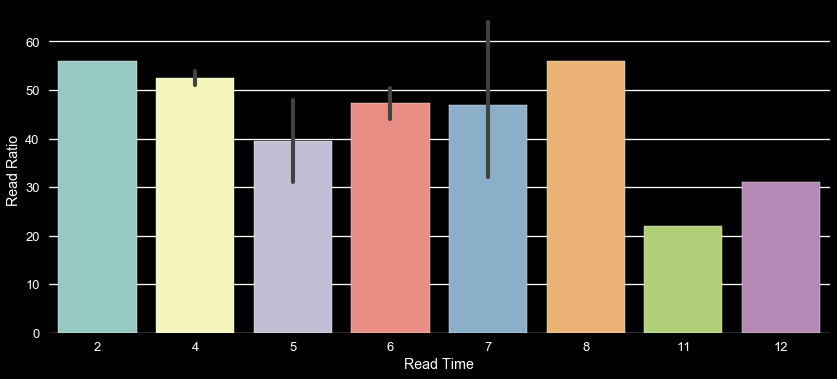

In [220]:
# Medium estimated read time vs actual read ratio
plt.figure(figsize=(14,6))
plt.style.use('seaborn-deep')
plt.style.use(['dark_background'])
sns.barplot(x='Read Time', y='Read Ratio', data=df)

A very interesting trend I explored here which undoubtedly changed my opinion. While I started writing articles, I used to think that less lengthy the article, more will be the read ratio. As we are rarely patient to go to the main point (as least I am). Turns out to be not true all the time. The articles I wrote with read-time 7mins (pretty-much long and detailed to be obvious, gained read ratio > 60! I must say I gained serious fans and readers!😁

![bw](https://c.tenor.com/moJ0WYu8YwIAAAAC/scarlett-johansson-smile.gif "bw")

-------------------------------------------------------------------------------------------------------------------------------

Well, fans in medium are the people who clapped 👏 your post. In case you know that, you must also know that not all the people who reads the articles are your fans. So creating a new feature 'Fan Ratio' will help me discover how much my article was appreciated!

In [197]:
# percent of fans actually viewed my article
df['Fan Ratio'] = (df['Fans'] / df['Views']) * 100
df.sort_values('Fan Ratio', ascending=False)

df.head(15)

,Title,Publication,Read Time,Views,Reads,Read Ratio,Fans,Fan Ratio
0,The Complete XGBoost Therapy with Python,Python In Plain English,11,438,98,22,19,4.337900
1,Federated Learning-A Beginner's Guide,Analytics Vidhya,7,33,21,64,15,45.454545
2,Automated Hyperparameter Tuning with Keras Tun...,Analytics Vidhya,7,2200,706,32,37,1.681818
3,"Text Summarization using BERT, GPT2, XLNet",Analytics Vidhya,6,14600,6300,43,59,0.404110
4,Transformers — Let’s Dive Deeeep!,Analytics Vidhya,12,829,256,31,24,2.895054
5,Handling Imbalanced Data — Intuition to Implem...,Analytics Vidhya,5,1100,543,48,41,3.727273
6,Which Machine Learning Algorithm Should You Us...,Analytics Vidhya,5,29000,9000,31,600,2.068966
7,Flasgger —an API playground with Flask and Swa...,Analytics Vidhya,2,6600,3700,56,25,0.378788
8,COVID-19 Detector Flask App from Chest X-ray I...,Analytics Vidhya,4,1400,768,54,24,1.714286
9,"Automated, Quick and Powerful EDA with Sweetvi...",Analytics Vidhya,6,694,312,45,19,2.737752


Now let's plot Title Vs Fan Ratio to see the results!

Text(0, 0.5, '')

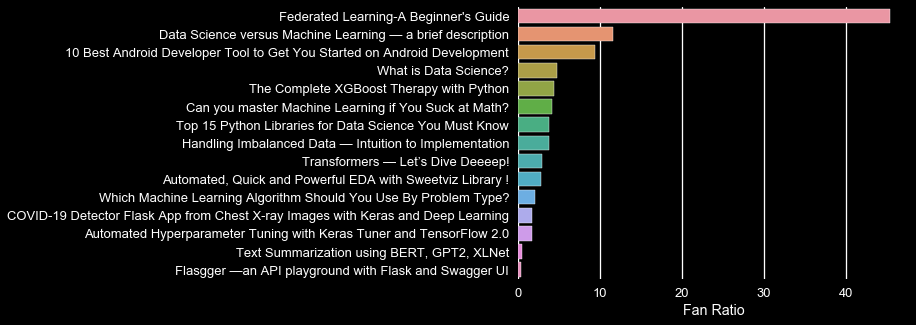

In [206]:
plt.figure(figsize=(7,5))
plt.style.use('_classic_test_patch')
sorted_fan_ratio = df.sort_values(by='Fan Ratio', ascending=False).head(15)
graph_fan_ratio = sns.barplot('Fan Ratio', 'Title', data=sorted_fan_ratio)
plt.ylabel('')

Nothing surprising as Federated Learning is an emerging tech and hence maximum fans who wait for my articles will click on this one as soon as they see it on their feed!

-------------------------------------------------------------------------------------------------------------------------------

Now comes the most crucial part. To see if publication popularity and standard matters in article engagement. I always get confused after writing a story, when I have to submit it to a publication, it becomes a tough choice, specially when both are good. The following result will now help me decide quickly, by telling me which publication gives me more followers and readers!

In [224]:
#publication stats - let's see which pubs gave me more fans
fanratio_of_pubs = df.groupby('Publication').mean()['Fan Ratio']
fanratio_of_pubs = fanratio_of_pubs.sort_values(ascending=False)
print(fanratio_of_pubs)

Publication
Analytics Vidhya           6.485047
Python In Plain English    4.337900
Name: Fan Ratio, dtype: float64


In [225]:
#publication stats - let's see which pubs gave me more reads
reads_of_pubs = df.groupby('Publication').mean()['Read Ratio']
reads_of_pubs = fanratio_of_pubs.sort_values(ascending=False)
print(reads_of_pubs)

Publication
Analytics Vidhya           6.485047
Python In Plain English    4.337900
Name: Fan Ratio, dtype: float64


They results are no doubt correct, as Analytics Vidhya is a more renowned and big community especially for data science practitioners and professionals compared to Python In Plain English. Hence, it is subjected to provide more engagement and fans in my articles published there. 

I also must mention that, I joined Python In Plain English just a few weeks ago and hence only my latest blog is published there. Hence in a data science perspective, my data is biased on articles published at Analytics Vidhya, hence the above results. I will get more clear idea what's going on under the hood, once I have enough articles published on both the publications!

The graph visualizing the scores gained, is shown below for better intuition!

Text(0, 0.5, '')

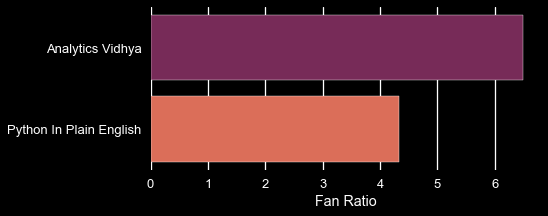

In [226]:
# watch publications effect on Fan Ratio
plt.figure(figsize=(7,3))
sns.barplot(x=fanratio_of_pubs, y=fanratio_of_pubs.index, palette= 'rocket')
plt.ylabel('')

<Figure size 288x216 with 0 Axes>

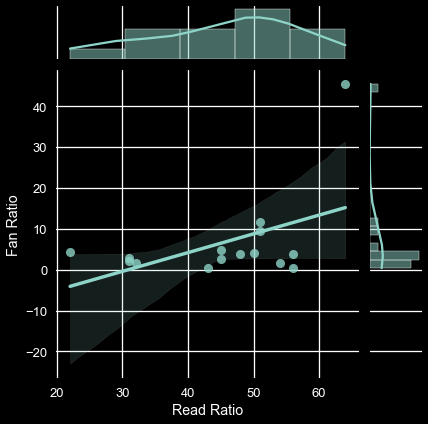

In [214]:
# do fans read posts because they are 'fans' or they actually love it?
plt.figure(figsize=(4,3))
jplot = sns.jointplot('Read Ratio', 'Fan Ratio', df, kind='reg')
#jplot.annotate(stats.pearsonr)
plt.show(jplot)

A very intuitive visualization that speaks for itself! Notice how maximum points lie close to the regression fit line in the shaded region, which clearly proves that my articles are not only having good engagement but also very much likely for reading which creates a strong chance of receiving more fans very soon!

A jump from only 6 fans last year to 405 right now clearly proves what the graph just showed!

YAY!!! 

![huehuehue](https://media0.giphy.com/media/HrCPqcP2PMe4Dlb20y/giphy.gif "huehuehue")

In [216]:
column_1 = df['Read Ratio']
column_2 = df['Fan Ratio']
pearson_corr_coeff = column_1.corr(column_2)

print("Pearson Correlation Coefficient b/w fan ratio and read ratio is: ",pearson_corr_coeff)
print("Status - Approximately, 50% correlation found. It's finely correlated. Hence, my articles not only attract fans, but also readers.")

Pearson Correlation Coefficient b/w fan ratio and read ratio is:  0.4765250872488176
Status - Approximately, 50% correlation found. It's finely correlated. Hence, my articles not only attract fans, but also readers.


# Summing it up!

So, let's sum up what critical insights I gained which will be extremely helpful while writing the next article!

Top 3 insights gained from the analysis-
1. Top 3 artciles till now -
1st - Which Machine Learning Algorithm Should You Use By Problem Type?
2nd - Text Summarization using BERT, GPT2, XLNet
3rd - Handling Imbalanced Data — Intuition to Implementation

**Insight - Readers are more likely to be engaged with ML, Data Handling 
and NLP topics.**

2. Publication popularity and followers matters for more engagement. 

**Insight- Stories published by Analytics Vidhya gained far better engagement and fans, 
compared to Python in Plain english.**

3. Read Ratio and Fan Ratio are strongly correlated. 

**Insight - Stories that are good gets both fans, existing fan reads and other user reads.**

*******************************************************************************************************************************